In [1]:
import shap
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load California dataset
X, y = shap.datasets.california(n_points=1000)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
# Simple regression model
model = tf.keras.Sequential([
    tf.keras.Input(shape = (X_train_scaled.shape[1], )),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=0)

In [8]:
# DeepExplainer assumes TensorFlow models by default
explainer = shap.DeepExplainer(model, X_train_scaled[:100])  # Use a subset as background
shap_values = explainer.shap_values(X_test_scaled[:100])  # Analyze a subset of test data

c:\Users\devdw\anaconda3\envs\behavioral-data-science\Lib\site-packages\shap\explainers\_deep\deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
c:\Users\devdw\anaconda3\envs\behavioral-data-science\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_5
Received: inputs=['Tensor(shape=(100, 8))']
  warnings.warn(msg)
c:\Users\devdw\anaconda3\envs\behavioral-data-science\Lib\site-packages\keras\src\models\functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_5
Received: inputs=['Tensor(shape=(2

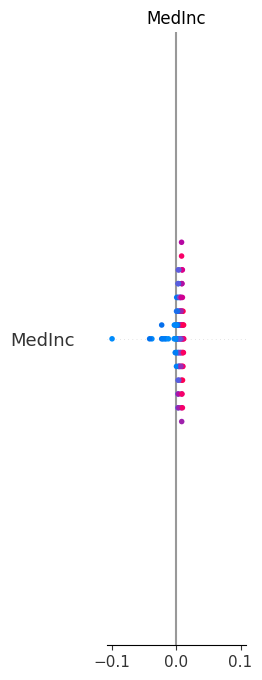

In [10]:
shap.summary_plot(shap_values, X_test.iloc[:100])